Nama : Wilson

NPM : 6182001039

# Metode Newton

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Salah satu metode yang digunakan untuk melakukan interpolasi adalah metode Newton. Untuk melakukan interpolasi Newton, perlu dicari koefisien dari polinom dengan metode beda hingga (finite divided differences). Lengkapi fungsi di bawah ini untuk menentukan koefisien dari polinom Newton yang didapatkan dengan metode beda hingga.

In [7]:
def divided_diff(x, y):
    
    n = len(y)
    matrix = np.zeros([n, n])
 
    matrix[:,0] = y
    
    for i in range(1,n):
        for j in range(n-i):
            matrix[j][i] = (matrix[j+1][i-1] - matrix[j][i-1]) / (x[j+i]-x[j])
            
    return matrix

Setelah mendapat matriks yang berisi dari koefisien Newton, sekarang gunakan data koefisien tersebut (perhatikan yang digunakan hanya elemen pada baris pertama matriks koefisien) dan vektor x (yang berasalah dari data) untuk mencari nilai polinom di sebuah nilai x (atau vektor x). Lengkapi fungsi polinomial Newton berikut ini.

In [8]:
def newton_poly(matrix, x_data, x):
   
    n = len(x_data) - 1 
    p = matrix[n]
    for k in range(1,n+1):
        p = matrix[n-k] + (x -x_data[n-k])*p
    return p

Jalankan perintah di bawah ini untuk menguji apakah fungsi yang Anda buat sebelumnya sudah berjalan dan menghasilkan hasil yang benar.

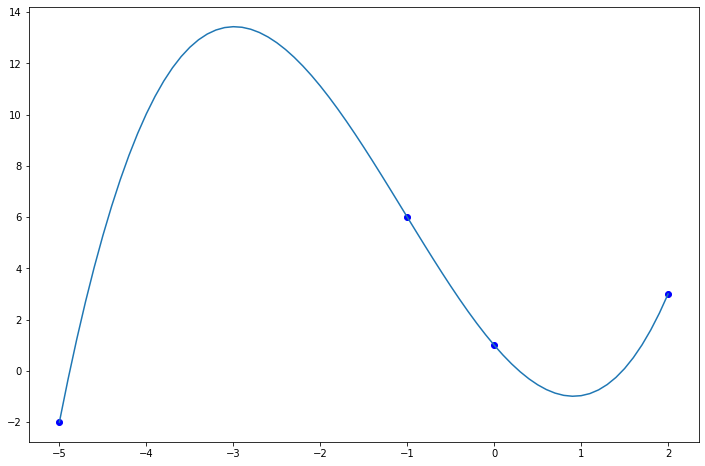

In [9]:
x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])

a_s = divided_diff(x, y)[0, :]

x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)
plt.show()

# Metode Lagrange

Selain menggunakan metode beda hingga, interpolasi dapat juga dilakukan dengan menggunakan polinom Lagrange. Polinom Lagrange adalah reformulasi dari polinom Newton (menghilangkan bagian perhitungan beda hingganya). Menghilangkan perhitungan beda hingga akan mengurangi banyaknya operasi pembagian yang dilakukan sehingga mengurangi masalah round-off error.

Lengkapilah fungsi berikut ini untuk mencari hasil interpolasi dengan menggunakan polinom Lagrange.

In [5]:
def my_lagrange(x, y, X):

    res = 0
    for i in range (len (x)):
        P = y[i]
        for j in range (len(x)):
            if i != j:
                P = P * (X - x[j])/(x[i]-x[j])
        res = res + P
    return res


Jalankan perintah di bawah ini untuk menguji apakah fungsi yang Anda buat sebelumnya sudah berjalan dan menghasilkan hasil yang benar.

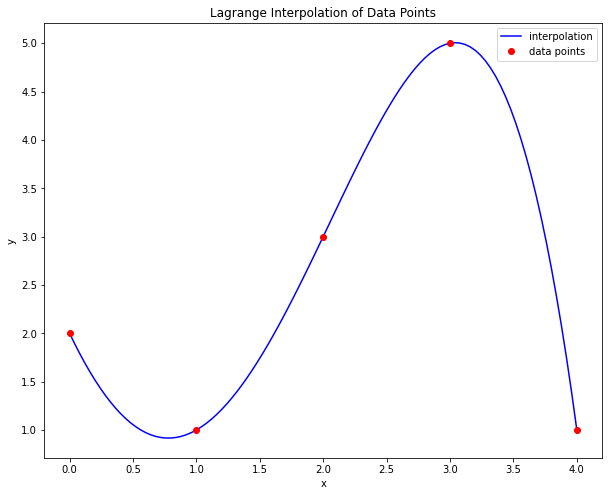

In [6]:
x = [0, 1, 2, 3, 4]
y = [2, 1, 3, 5, 1]
X = np.linspace(0, 4, 101)
plt.figure(figsize = (10,8 ))
plt.plot(X, my_lagrange(x, y, X), "b", label = "interpolation")
plt.plot(x, y, "ro", label = "data points")
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Lagrange Interpolation of Data Points")
plt.legend()
plt.show()